# Future Work Example for the project
- Interactive plots (Plotly, Bokeh)
- Net Entry/Exits to analyze traffic flow - residential verse commercial area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from bokeh.plotting import figure, show, output_file, save
from bokeh.embed import components, file_html
from bokeh.models import CategoricalColorMapper, HoverTool

from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv('./data/cleaned_mta_df.csv', parse_dates=["DATETIME"], index_col=0)
df.head()

/Users/crystalhuang/anaconda3/envs/metis/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,STATION,DATETIME,DAY_OF_WEEK,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC
0,59 ST,2020-03-21 04:00:00,Saturday,2.0,4.0,6.0
1,59 ST,2020-03-21 08:00:00,Saturday,3.0,13.0,16.0
2,59 ST,2020-03-21 12:00:00,Saturday,24.0,21.0,45.0
3,59 ST,2020-03-21 16:00:00,Saturday,59.0,24.0,83.0
4,59 ST,2020-03-21 20:00:00,Saturday,25.0,16.0,41.0


In [3]:
# DF datetime objects
df["DATE"] = pd.to_datetime(df['DATETIME']).dt.date
df["TIME"] = pd.to_datetime(df['DATETIME']).dt.time
df['DAY_OF_WEEK'] = pd.to_datetime(df['DATETIME']).dt.dayofweek

# DF for each Station daily total traffic
station_daily = df.groupby(["STATION","DATE"])[['TOTAL_TRAFFIC']].sum().reset_index()

# DF for each station sum total traffic during pandemic
stations_total = station_daily.groupby('STATION').sum()\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index()

# DF ranking station
station_avg = station_daily.groupby('STATION').mean().round(0)\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index()

# Get top 10 daily avg
top_10_avg_daily = station_avg[:10]

# List of top 10 stations
top10_list = list(top_10_avg_daily['STATION'])

# DF of top 10 stations
top10_df = df[df['STATION'].isin(top10_list)]
top10_df.head()

,STATION,DATETIME,DAY_OF_WEEK,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC,DATE,TIME
0,59 ST,2020-03-21 04:00:00,5,2.0,4.0,6.0,2020-03-21,04:00:00
1,59 ST,2020-03-21 08:00:00,5,3.0,13.0,16.0,2020-03-21,08:00:00
2,59 ST,2020-03-21 12:00:00,5,24.0,21.0,45.0,2020-03-21,12:00:00
3,59 ST,2020-03-21 16:00:00,5,59.0,24.0,83.0,2020-03-21,16:00:00
4,59 ST,2020-03-21 20:00:00,5,25.0,16.0,41.0,2020-03-21,20:00:00


In [4]:
# DF for Top 10 stations sum total traffic
top10_daily = top10_df.groupby("DATETIME")['TOTAL_TRAFFIC'].sum().round().reset_index()
top10_daily

,DATETIME,TOTAL_TRAFFIC
0,2020-03-21 04:00:00,7108.0
1,2020-03-21 08:00:00,25835.0
2,2020-03-21 12:00:00,38712.0
3,2020-03-21 16:00:00,51838.0
4,2020-03-21 20:00:00,41260.0
...,...,...
2178,2021-03-19 04:00:00,6087.0
2179,2021-03-19 08:00:00,88051.0
2180,2021-03-19 12:00:00,124732.0
2181,2021-03-19 16:00:00,157388.0


In [5]:
# Bokeh Plot on Top 10 Station Traffic Pattern during Pandemic
top10_plot = figure(plot_width=1200, plot_height=500, 
                    x_axis_label='Date',y_axis_label='traffic count', 
                    x_axis_type="datetime")

top10_plot.line('DATETIME', 'TOTAL_TRAFFIC', source=top10_daily)

top10_plot.title.text = "Top 10 Station Traffic Pattern during Pandemic"
top10_plot.title.align = "center"
top10_plot.title.text_color = "black"
top10_plot.title.text_font_size = "25px"
#output_file("Timeseries.html")
show(top10_plot)
#save(top10_plot)
#from bokeh.resources import CDN
#html= file_html(top10_plot, CDN, "Timeseries plot")

In [6]:
# Timeperiod
top10_df['TIME']= top10_df.TIME.astype('str')
time_period = {
    "04:00:00": "00:00-04:00",
    "08:00:00": "04:00-08:00",
    "12:00:00": "08:00-12:00",
    "16:00:00": "12:00-16:00",
    "20:00:00": "16:00-20:00",
    "00:00:00": "20:00-00:00"
}
top10_df['TIME_PERIOD'] = top10_df.TIME.map(time_period)

# Net Entry/Exit
top10_df['NET_CHANGE'] = top10_df.EXIT_DIFF - top10_df.ENTRY_DIFF

top10_df.head()

<ipython-input-6-1aacc4f17445>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['TIME']= top10_df.TIME.astype('str')
<ipython-input-6-1aacc4f17445>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['TIME_PERIOD'] = top10_df.TIME.map(time_period)
<ipython-input-6-1aacc4f17445>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,STATION,DATETIME,DAY_OF_WEEK,ENTRY_DIFF,EXIT_DIFF,TOTAL_TRAFFIC,DATE,TIME,TIME_PERIOD,NET_CHANGE
0,59 ST,2020-03-21 04:00:00,5,2.0,4.0,6.0,2020-03-21,04:00:00,00:00-04:00,2.0
1,59 ST,2020-03-21 08:00:00,5,3.0,13.0,16.0,2020-03-21,08:00:00,04:00-08:00,10.0
2,59 ST,2020-03-21 12:00:00,5,24.0,21.0,45.0,2020-03-21,12:00:00,08:00-12:00,-3.0
3,59 ST,2020-03-21 16:00:00,5,59.0,24.0,83.0,2020-03-21,16:00:00,12:00-16:00,-35.0
4,59 ST,2020-03-21 20:00:00,5,25.0,16.0,41.0,2020-03-21,20:00:00,16:00-20:00,-9.0


In [7]:
### Create Pivot tables for two stations just for example
## 34 ST-PENN STA
penn_df = top10_df[top10_df.STATION == "34 ST-PENN STA"]
# Group by Date and time for total count across the stations
penn_df.groupby(['DATE', 'DAY_OF_WEEK', 'TIME_PERIOD'])['NET_CHANGE']\
                        .sum().round(0).reset_index()
# Group by Day of Week and time period for the average count
penn_time = penn_df.groupby(['DAY_OF_WEEK', 'TIME_PERIOD'])['NET_CHANGE']\
                            .sum().round().reset_index()
# Pivot table for time vs day of week
penn_hm = penn_time.pivot(index=["TIME_PERIOD"], columns=['DAY_OF_WEEK'], values='NET_CHANGE')
penn_hm.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


## FLUSHING-MAIN
flushing_df = top10_df[top10_df.STATION == "FLUSHING-MAIN"]
flushing_df.groupby(['DATE', 'DAY_OF_WEEK', 'TIME_PERIOD'])['NET_CHANGE']\
                        .sum().round(0).reset_index()
# Group by Day of Week and time period for the average count
flushing_time = flushing_df.groupby(['DAY_OF_WEEK', 'TIME_PERIOD'])['NET_CHANGE']\
                            .sum().round().reset_index()
# Pivot table for time vs day of week
flushing_hm = flushing_time.pivot(index=["TIME_PERIOD"], columns=['DAY_OF_WEEK'], values='NET_CHANGE')
flushing_hm.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

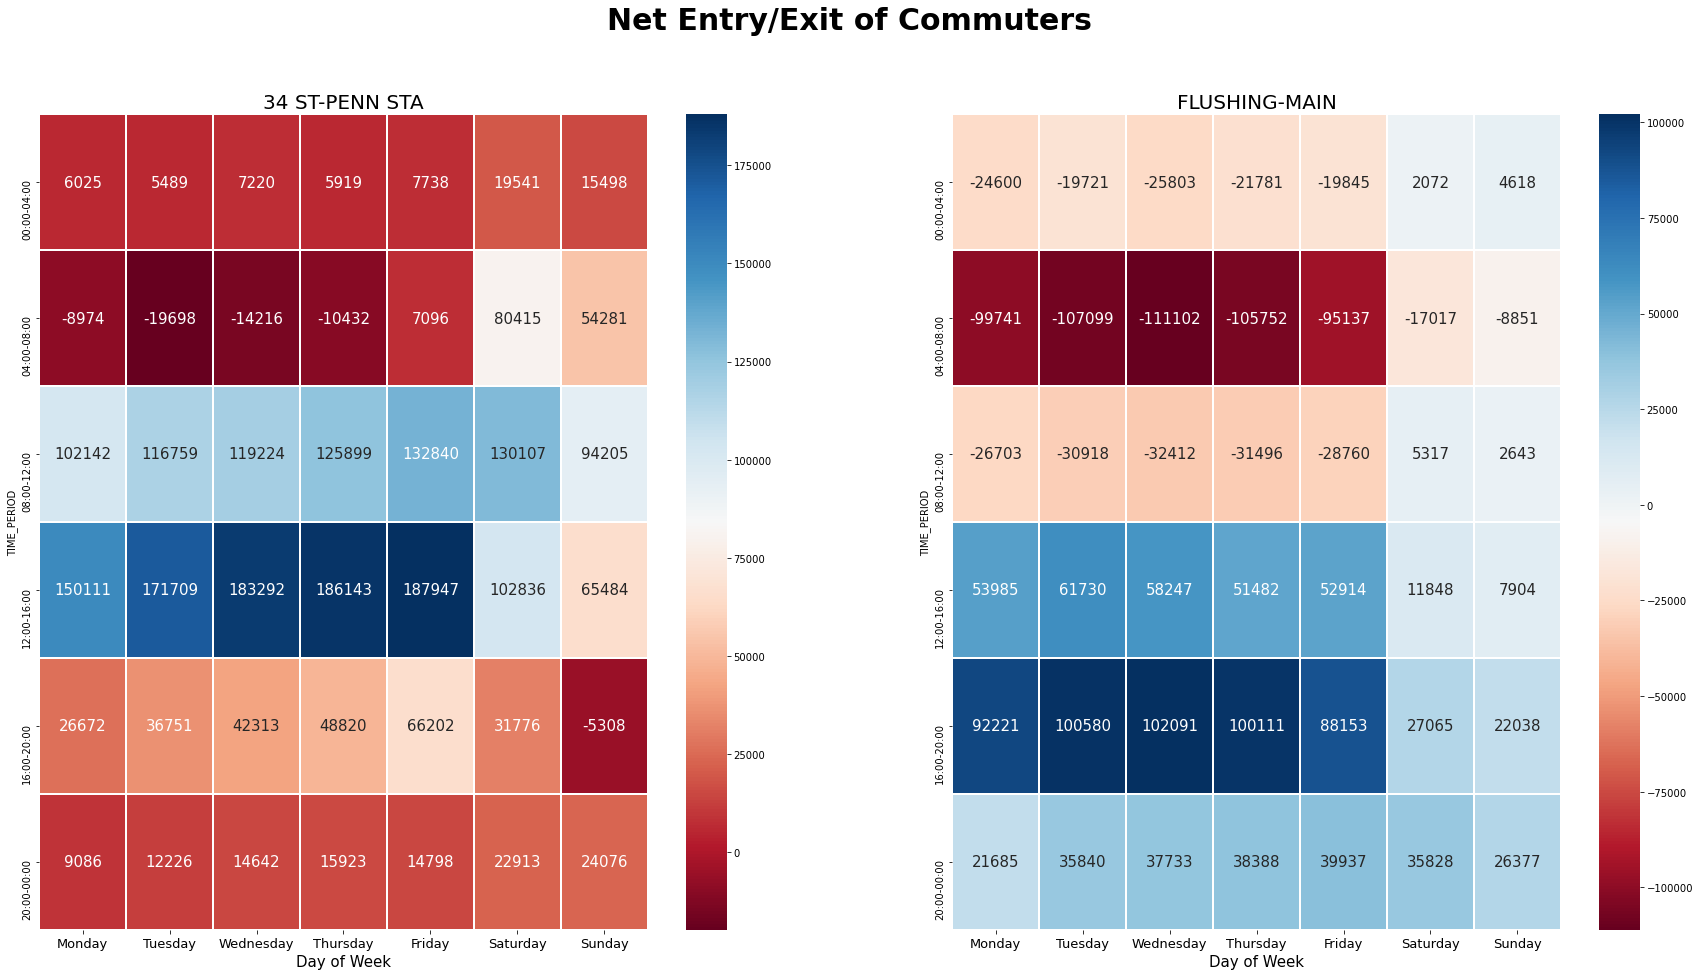

In [8]:
# Heat maps 

plt.figure(figsize=[30,15])
plt.suptitle("Net Entry/Exit of Commuters", size=30, weight='bold')
plt.subplot(1,2,1)
sns.heatmap(penn_hm, cmap='RdBu', linecolor='white', linewidths=1, annot=True, fmt=".0f", annot_kws={"size":15})
plt.title("34 ST-PENN STA", size=20)
plt.xlabel("Day of Week", size=15)
plt.xticks(size=13)

plt.subplot(1,2,2)
sns.heatmap(flushing_hm, cmap='RdBu', linecolor='white', linewidths=1, annot=True, fmt=".0f", annot_kws={"size":15})
plt.title("FLUSHING-MAIN", size=20)
plt.xlabel("Day of Week", size=15)
plt.xticks(size=13);

plt.savefig("NetHeatmaps.png")